# ECE C247 - Neural Networks & Deep Learning, EEG Project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/247/247_project'

/content/drive/My Drive/247/247_project


In [ ]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [ ]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [ ]:
data_path = "/content/drive/My Drive/247/247_project/project/"

# load data files subjects=[1,2,3,4,5,6,7,8,9]
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1], verbose=True)

Training/Valid data shape: (237, 22, 1000)
Test data shape: (50, 22, 1000)


In [ ]:
pip install --upgrade scipy


## Preprocessing

In [ ]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [ ]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

In [ ]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.48911
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.34281
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.46586
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.46532
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.34572
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.37421
	Train loss: 0.04391, Accuracy: 427/1692 (25.24%)
	Validation loss: 0.00336, Accuracy: 103/423 (24.35%)
	Test loss: 0.00313, Accuracy: 119/443 (26.86%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.43520
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.40799
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.38946
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.47837
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.38690
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.42713
	Train loss: 0.04367, Accuracy: 455/1692 (26.89%)
	Validation loss: 0.00334, Accuracy: 128/42

## LSTM

Epoch 1/100, Train Loss: 1.4356316526730855, Train Acc: 0.21164021164021163, Val Loss: 1.3740311861038208, Val Acc: 0.20833333333333334
Epoch 2/100, Train Loss: 1.3999368945757549, Train Acc: 0.30687830687830686, Val Loss: 1.371517539024353, Val Acc: 0.3333333333333333
Epoch 3/100, Train Loss: 1.3759412964185078, Train Acc: 0.30158730158730157, Val Loss: 1.3701958656311035, Val Acc: 0.3125
Epoch 4/100, Train Loss: 1.3636732300122578, Train Acc: 0.24338624338624337, Val Loss: 1.377150535583496, Val Acc: 0.3125
Epoch 5/100, Train Loss: 1.3686432043711345, Train Acc: 0.2962962962962963, Val Loss: 1.3907872438430786, Val Acc: 0.2916666666666667
Epoch 6/100, Train Loss: 1.3272766470909119, Train Acc: 0.3439153439153439, Val Loss: 1.404651165008545, Val Acc: 0.20833333333333334
Epoch 7/100, Train Loss: 1.3177629311879475, Train Acc: 0.3915343915343915, Val Loss: 1.4134345054626465, Val Acc: 0.22916666666666666
Epoch 8/100, Train Loss: 1.2880057493845622, Train Acc: 0.4021164021164021, Val Lo

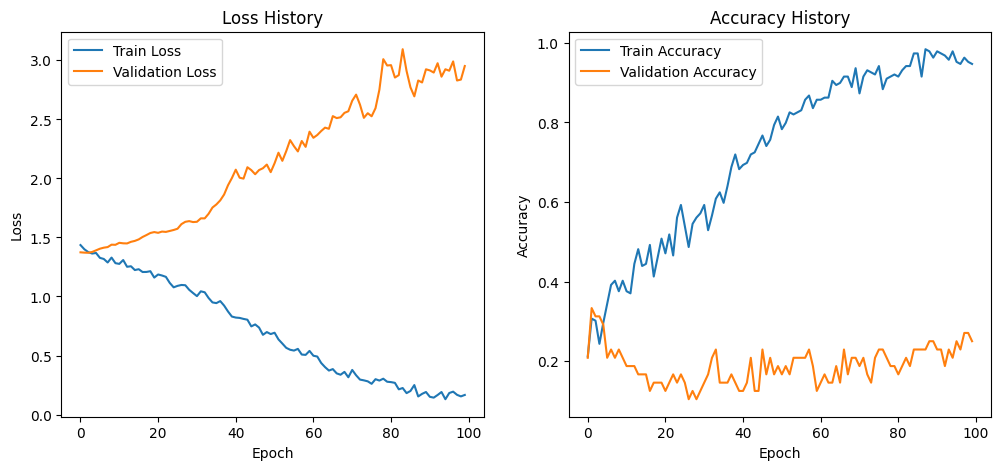

In [ ]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Epoch 1/100, Train Loss: 1.4280012463623624, Train Acc: 0.2718676122931442, Val Loss: 1.397244930267334, Val Acc: 0.2222222222222222
Epoch 2/100, Train Loss: 1.4042235005576655, Train Acc: 0.25472813238770686, Val Loss: 1.3940012454986572, Val Acc: 0.24349881796690306
Epoch 3/100, Train Loss: 1.399636318098824, Train Acc: 0.25177304964539005, Val Loss: 1.3909398317337036, Val Acc: 0.24822695035460993
Epoch 4/100, Train Loss: 1.3961633646263267, Train Acc: 0.2777777777777778, Val Loss: 1.390608787536621, Val Acc: 0.22458628841607564
Epoch 5/100, Train Loss: 1.3906236752024237, Train Acc: 0.274822695035461, Val Loss: 1.3932167291641235, Val Acc: 0.23877068557919623
Epoch 6/100, Train Loss: 1.387726678038543, Train Acc: 0.26891252955082745, Val Loss: 1.3964734077453613, Val Acc: 0.23167848699763594
Epoch 7/100, Train Loss: 1.3837884124719873, Train Acc: 0.2872340425531915, Val Loss: 1.3935540914535522, Val Acc: 0.2458628841607565
Epoch 8/100, Train Loss: 1.3776711360463556, Train Acc: 0.2

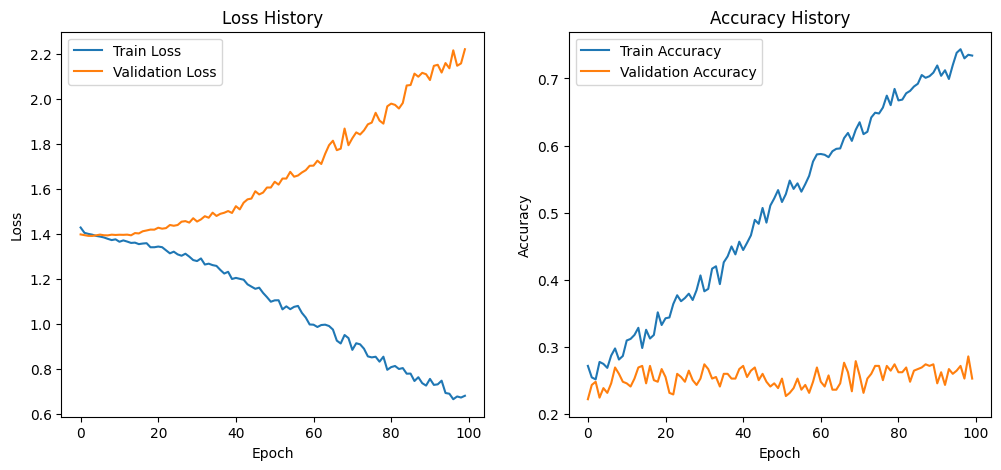

In [ ]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Epoch 1/100, Train Loss: 1.388475775718689, Train Acc: 0.2641843971631206, Val Loss: 1.3859564065933228, Val Acc: 0.22695035460992907
Epoch 2/100, Train Loss: 1.3859366920759093, Train Acc: 0.266548463356974, Val Loss: 1.3847424983978271, Val Acc: 0.2789598108747045
Epoch 3/100, Train Loss: 1.3583590759421296, Train Acc: 0.3191489361702128, Val Loss: 1.3678529262542725, Val Acc: 0.31678486997635935
Epoch 4/100, Train Loss: 1.3356255720246513, Train Acc: 0.3061465721040189, Val Loss: 1.324019432067871, Val Acc: 0.35697399527186763
Epoch 5/100, Train Loss: 1.314131736755371, Train Acc: 0.3256501182033097, Val Loss: 1.3510079383850098, Val Acc: 0.33569739952718675
Epoch 6/100, Train Loss: 1.3061500090473104, Train Acc: 0.3321513002364066, Val Loss: 1.3210755586624146, Val Acc: 0.35933806146572106
Epoch 7/100, Train Loss: 1.2906853927756257, Train Acc: 0.34988179669030733, Val Loss: 1.3208707571029663, Val Acc: 0.3546099290780142
Epoch 8/100, Train Loss: 1.285957136244144, Train Acc: 0.341

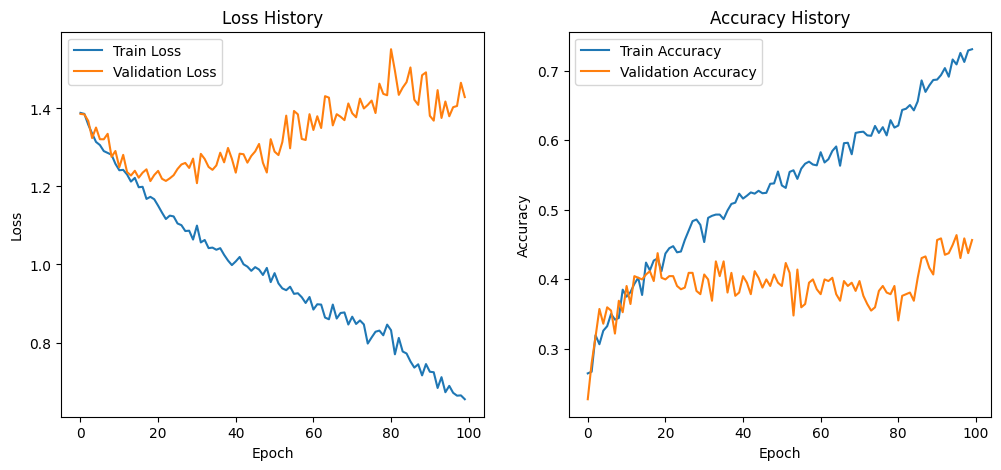

In [ ]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Epoch 1/100, Train Loss: 1.389591154062523, Train Acc: 0.25059101654846333, Val Loss: 1.3867557048797607, Val Acc: 0.2695035460992908
Epoch 2/100, Train Loss: 1.37446428694815, Train Acc: 0.28841607565011823, Val Loss: 1.38466477394104, Val Acc: 0.2860520094562648
Epoch 3/100, Train Loss: 1.3524615089848357, Train Acc: 0.31560283687943264, Val Loss: 1.4145766496658325, Val Acc: 0.2860520094562648
Epoch 4/100, Train Loss: 1.3172837225896008, Train Acc: 0.33628841607565013, Val Loss: 1.314335823059082, Val Acc: 0.37825059101654845
Epoch 5/100, Train Loss: 1.3032375686573532, Train Acc: 0.35106382978723405, Val Loss: 1.2854470014572144, Val Acc: 0.3877068557919622
Epoch 6/100, Train Loss: 1.2783354948151786, Train Acc: 0.3947990543735225, Val Loss: 1.2677737474441528, Val Acc: 0.39952718676122934
Epoch 7/100, Train Loss: 1.2767599731121424, Train Acc: 0.3806146572104019, Val Loss: 1.2544773817062378, Val Acc: 0.3971631205673759
Epoch 8/100, Train Loss: 1.261055420029838, Train Acc: 0.3699

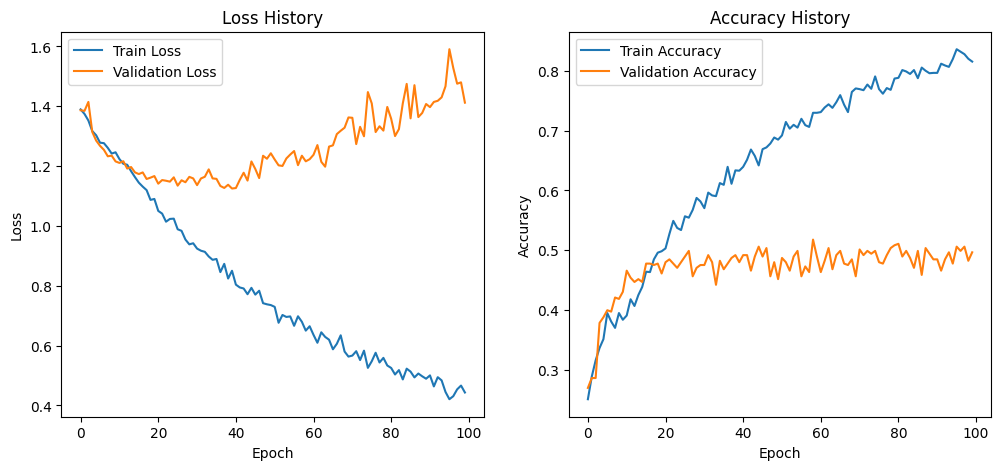

In [ ]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)